## Lección 4: Distribución Muestral y Teorema del Límite Central (TLC)

### 1. Generar distribuciones muestrales de media a partir del dataset simulado

Para comprobar cómo funciona el Teorema del Límite Central (TLC) en la práctica, vamos a realizar un ejercicio de remuestreo sobre nuestra variable de **Horas de Sueño**. 

Tomaremos nuestra base de datos (`Muestra_universidad.csv`) como si fuera la población total. A partir de ella, extraeremos muchas submuestras aleatorias (por ejemplo, 1000 grupos de 30 estudiantes) y calcularemos el promedio de horas de sueño para cada uno de esos pequeños grupos. 

Al juntar todos esos promedios, crearemos una **distribución muestral de la media**. La magia del TLC es que, sin importar la forma de los datos originales, la distribución de estos promedios siempre tenderá a formar una campana de Gauss (distribución normal) si el tamaño de la submuestra es lo suficientemente grande ($n \geq 30$).

In [14]:
import pandas as pd
import numpy as np

# 1. Cargar la base de datos
df = pd.read_csv('Muestra_universidad.csv')

# 2. Configurar los parámetros de la simulación
n_muestra = 30       # Tamaño de cada submuestra (30 es el mínimo sugerido para el TLC)
repeticiones = 1000  # Cantidad de veces que repetiremos el experimento

# Lista vacía para ir guardando los promedios
medias_muestrales = []

# 3. Bucle para extraer muestras y calcular sus medias
# Fijamos una semilla para que el resultado sea el mismo siempre que lo corras
np.random.seed(42) 

for _ in range(repeticiones):
    # Extraer una muestra aleatoria de tamaño n_muestra con reemplazo
    muestra_aleatoria = np.random.choice(df['Horas_Sueno'], size=n_muestra, replace=True)
    # Calcular el promedio de esa muestra y agregarlo a la lista
    medias_muestrales.append(np.mean(muestra_aleatoria))

# 4. Convertimos la lista en una Serie de Pandas para facilitar su uso posterior
df_medias = pd.Series(medias_muestrales, name='Medias_Horas_Sueno')

print(f"Se generaron exitosamente {len(df_medias)} medias muestrales.")
print("Aquí están los primeros 5 promedios calculados:")
print(df_medias.head())

Se generaron exitosamente 1000 medias muestrales.
Aquí están los primeros 5 promedios calculados:
0    6.450000
1    6.496667
2    6.546667
3    6.456667
4    6.713333
Name: Medias_Horas_Sueno, dtype: float64


### 2. Verificar empíricamente el Teorema del Límite Central

Para confirmar que el TLC se cumple en nuestro estudio, contrastaremos los parámetros de nuestra población original (los 385 estudiantes del CSV) frente a los de la distribución muestral que generamos en el paso anterior. 

Según la teoría, se deben cumplir las siguientes igualdades:
1. **Igualdad de Medias:** La media de las medias muestrales ($\mu_{\bar{x}}$) debe ser igual a la media poblacional ($\mu$).
2. **Error Estándar:** La desviación estándar de las medias muestrales debe ser igual a la desviación poblacional dividida por la raíz del tamaño de la submuestra ($\frac{\sigma}{\sqrt{n}}$).
3. **Normalidad Visual:** Al graficar los 1000 promedios, la forma resultante debe ser una campana de Gauss, suavizando cualquier irregularidad de los datos originales.

--- VERIFICACIÓN MATEMÁTICA DEL TLC ---
Media Poblacional Original:       6.5145 horas
Media de Medias Muestrales:       6.5150 horas
---------------------------------------------
Error Estándar Teórico (Fórmula): 0.2084
Error Estándar Empírico (Datos):  0.1997


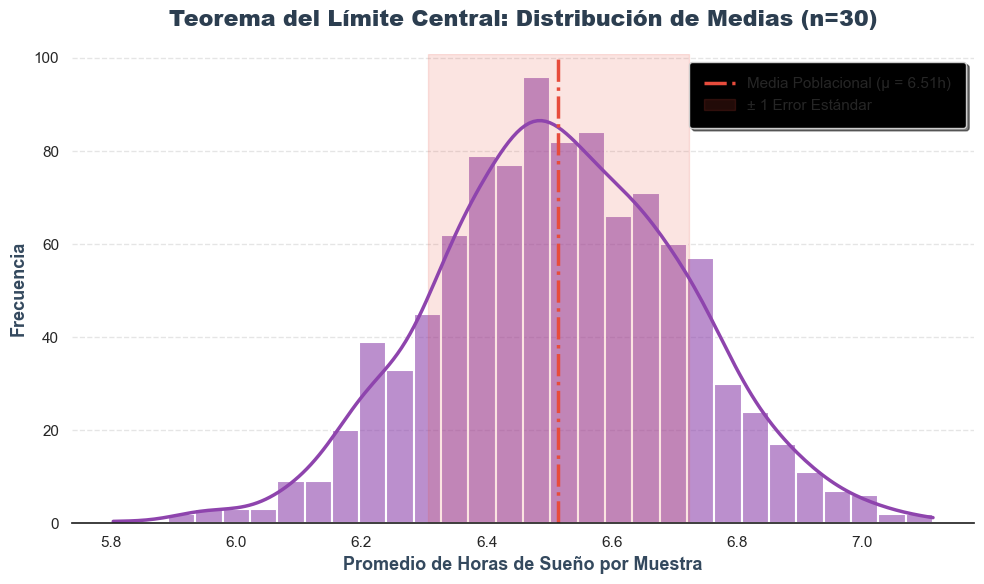

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Cálculos de la población original
media_poblacional = df['Horas_Sueno'].mean()
desviacion_poblacional = df['Horas_Sueno'].std()

# 2. Cálculos de la distribución muestral (de los 1000 promedios)
media_muestral_promedio = df_medias.mean()
error_estandar_empirico = df_medias.std()

# Cálculo del error estándar teórico esperado por la fórmula del TLC
n_muestra = 30 # El tamaño que usamos en el bucle anterior
error_estandar_teorico = desviacion_poblacional / np.sqrt(n_muestra)

print("--- VERIFICACIÓN MATEMÁTICA DEL TLC ---")
print(f"Media Poblacional Original:       {media_poblacional:.4f} horas")
print(f"Media de Medias Muestrales:       {media_muestral_promedio:.4f} horas")
print("-" * 45)
print(f"Error Estándar Teórico (Fórmula): {error_estandar_teorico:.4f}")
print(f"Error Estándar Empírico (Datos):  {error_estandar_empirico:.4f}")

# 3. Comprobación visual 
# Configuramos un tema limpio sin fondo gris
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
fig, ax = plt.subplots(figsize=(10, 6))

# Creamos el histograma con un color morado elegante y bordes blancos
sns.histplot(df_medias, kde=True, color="#8E44AD", bins=30,
             edgecolor="white", linewidth=1.5, alpha=0.6,
             line_kws={'linewidth': 2.5}, ax=ax)

# Línea de la media poblacional con un estilo más llamativo
ax.axvline(media_poblacional, color='#E74C3C', linestyle='-.', linewidth=2.5,
            label=f'Media Poblacional (μ = {media_poblacional:.2f}h)')

# Novedad: Sombrear el área de +/- 1 Error Estándar (le da un toque muy técnico y visual)
ax.axvspan(media_poblacional - error_estandar_teorico,
           media_poblacional + error_estandar_teorico,
           color='#E74C3C', alpha=0.15, label='± 1 Error Estándar')

# Títulos y etiquetas estilizadas con mejor tipografía y colores oscuros (no negro puro)
ax.set_title('Teorema del Límite Central: Distribución de Medias (n=30)',
             fontsize=16, fontweight='heavy', pad=20, color="#2C3E50")
ax.set_xlabel('Promedio de Horas de Sueño por Muestra', fontsize=13, weight='bold', color="#34495E")
ax.set_ylabel('Frecuencia', fontsize=13, weight='bold', color="#34495E")

# Personalizar la leyenda para que tenga sombreado y bordes
ax.legend(frameon=True, shadow=True, borderpad=1, fontsize=11)

# Limpiar bordes innecesarios y dejar una cuadrícula sutil solo horizontal
sns.despine(left=True, bottom=False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 3. Comparación de la Distribución Poblacional vs. Muestral

Para entender el valor del Teorema del Límite Central, es fundamental observar las diferencias entre la distribución de los datos originales (individuos) y la distribución de las medias (grupos):

* **Amplitud (Varianza):** La distribución poblacional es ancha, ya que incluye los casos extremos (estudiantes que duermen 3 horas o 10 horas). En cambio, la distribución muestral es mucho más estrecha, porque al promediar a 30 estudiantes a la vez, los que duermen poco se compensan con los que duermen mucho, concentrando los valores cerca de la media central.
* **Forma:** Mientras que los datos originales podrían tener ciertas irregularidades o asimetrías, la distribución de las medias adopta una forma de campana perfecta (Normal).

Esta reducción de la variabilidad es la que nos permitirá, en el siguiente paso, calcular **Intervalos de Confianza** con alta precisión.

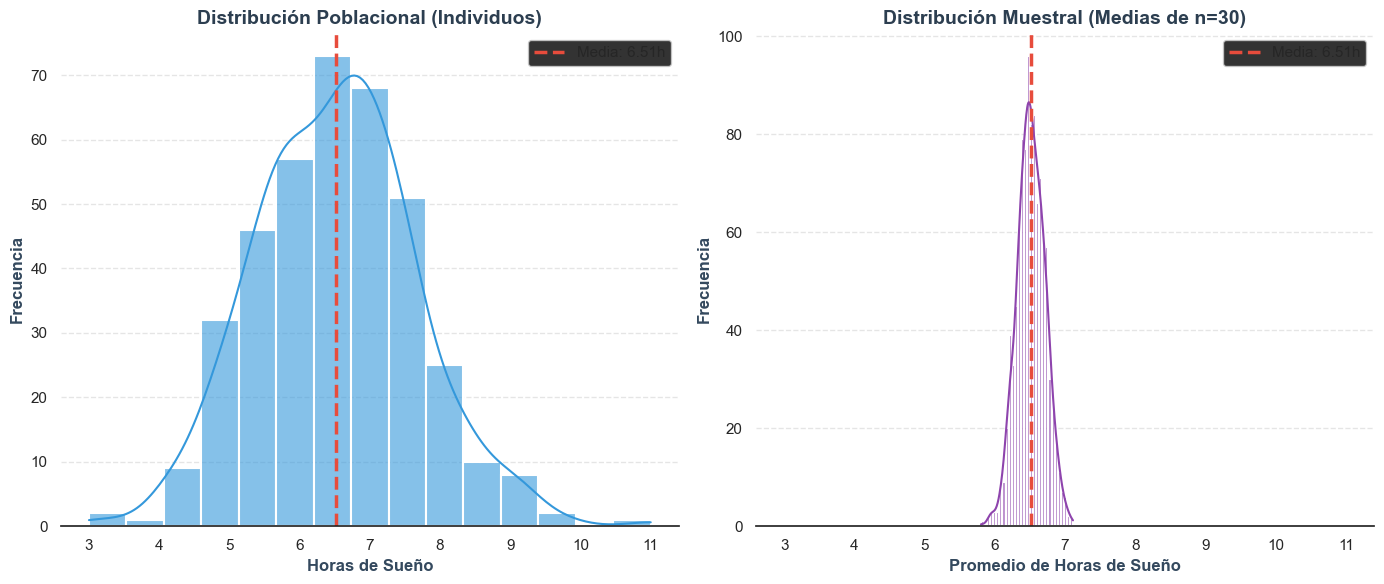

In [16]:
# 3. Comparación Visual: Población Original vs Distribución Muestral
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Gráfico 1: Población Original (Los 385 estudiantes)
sns.histplot(df['Horas_Sueno'], kde=True, color="#3498DB", ax=axes[0], 
             bins=15, alpha=0.6, edgecolor="white", linewidth=1.5)
axes[0].axvline(media_poblacional, color='#E74C3C', linestyle='--', linewidth=2.5, 
                label=f'Media: {media_poblacional:.2f}h')
axes[0].set_title('Distribución Poblacional (Individuos)', fontsize=14, weight='bold', color="#2C3E50")
axes[0].set_xlabel('Horas de Sueño', fontsize=12, weight='bold', color="#34495E")
axes[0].set_ylabel('Frecuencia', fontsize=12, weight='bold', color="#34495E")
axes[0].legend()

# Gráfico 2: Distribución Muestral (Los 1000 promedios)
sns.histplot(df_medias, kde=True, color="#8E44AD", ax=axes[1], 
             bins=30, alpha=0.6, edgecolor="white", linewidth=1.5)
axes[1].axvline(media_muestral_promedio, color='#E74C3C', linestyle='--', linewidth=2.5, 
                label=f'Media: {media_muestral_promedio:.2f}h')
axes[1].set_title('Distribución Muestral (Medias de n=30)', fontsize=14, weight='bold', color="#2C3E50")
axes[1].set_xlabel('Promedio de Horas de Sueño', fontsize=12, weight='bold', color="#34495E")
axes[1].set_ylabel('Frecuencia', fontsize=12, weight='bold', color="#34495E")
axes[1].legend()

# Ajustes estéticos finales
sns.despine(left=True, bottom=False)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 4. Análisis de la Dispersión de la Media según el Tamaño Muestral

El Teorema del Límite Central no solo nos dice que la distribución de las medias será normal, sino que también establece una relación matemática inversa entre el tamaño de la muestra ($n$) y la dispersión de los datos (Error Estándar): $SE = \frac{\sigma}{\sqrt{n}}$.

Esto significa que a medida que aumentamos el tamaño de nuestras submuestras, el denominador crece y el Error Estándar disminuye. En términos prácticos: **muestras más grandes producen estimaciones mucho más precisas y concentradas alrededor de la media real de la población.**

Para demostrar esto, simularemos la extracción de 1000 muestras utilizando tres tamaños diferentes:
* $n = 5$ (Muestra pequeña, alta dispersión esperada)
* $n = 30$ (Muestra estándar, dispersión moderada)
* $n = 100$ (Muestra grande, baja dispersión esperada)

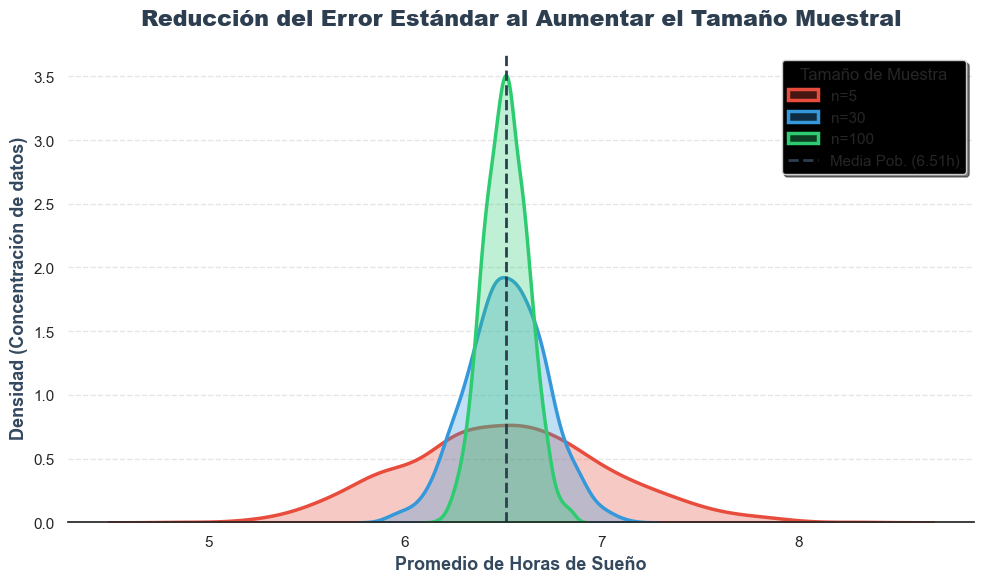

--- COMPARACIÓN DEL ERROR ESTÁNDAR ---
Para n=  5 -> Error Estándar: 0.5105
Para n= 30 -> Error Estándar: 0.2084
Para n=100 -> Error Estándar: 0.1141


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos tener los datos cargados
df = pd.read_csv('Muestra_universidad.csv')
media_pob = df['Horas_Sueno'].mean()

# Tamaños de muestra a evaluar
tamanos_n = [5, 30, 100]
repeticiones = 1000
resultados = {}

np.random.seed(42)

# Generar las distribuciones para cada tamaño de muestra
for n in tamanos_n:
    medias = []
    for _ in range(repeticiones):
        muestra = np.random.choice(df['Horas_Sueno'], size=n, replace=True)
        medias.append(np.mean(muestra))
    resultados[f'n={n}'] = medias

# Configuración del gráfico
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
fig, ax = plt.subplots(figsize=(10, 6))

colores = ['#E74C3C', '#3498DB', '#2ECC71'] # Rojo (n=5), Azul (n=30), Verde (n=100)

# Graficar las curvas de densidad (KDE) para superponerlas sin saturar la vista
for (etiqueta, datos), color in zip(resultados.items(), colores):
    sns.kdeplot(datos, fill=True, alpha=0.3, linewidth=2.5, color=color, label=etiqueta, ax=ax)

# Línea central de la media poblacional
ax.axvline(media_pob, color='#2C3E50', linestyle='--', linewidth=2, 
           label=f'Media Pob. ({media_pob:.2f}h)')

ax.set_title('Reducción del Error Estándar al Aumentar el Tamaño Muestral', 
             fontsize=16, fontweight='heavy', pad=20, color="#2C3E50")
ax.set_xlabel('Promedio de Horas de Sueño', fontsize=13, weight='bold', color="#34495E")
ax.set_ylabel('Densidad (Concentración de datos)', fontsize=13, weight='bold', color="#34495E")

ax.legend(title="Tamaño de Muestra", frameon=True, shadow=True, fontsize=11, title_fontsize=12)
sns.despine(left=True, bottom=False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Imprimir el cálculo exacto del error estándar para cada n
print("--- COMPARACIÓN DEL ERROR ESTÁNDAR ---")
desviacion_pob = df['Horas_Sueno'].std()
for n in tamanos_n:
    error_calc = desviacion_pob / np.sqrt(n)
    print(f"Para n={n:3d} -> Error Estándar: {error_calc:.4f}")